# Author

***Written by Ho Sy The***

Hanoi University of Science and Technology

IT1 04 - K65.

# Kmeans Clustering

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from keras.datasets import cifar10
from sklearn.metrics import accuracy_score
np.random.seed(11)

In [3]:
means = [[2, 2], [-2, 2], [2, -2], [-2, -2]]
cov = [[1, 0],
       [0, 1]]
       
N = 500
K = 4

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)

X = np.concatenate((X0, X1, X2, X3), axis = 0)
# original_label = np.asarray([0] * N + [1] * N + [2] * N + [3] * N).T

In [4]:
def kmeans_display(X, label):
  X0 = X[label == 0, :]
  X1 = X[label == 1, :]
  X2 = X[label == 2, :]
  X3 = X[label == 3, :]
  
  plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .9)
  plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .9)
  plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .9)
  plt.plot(X3[:, 0], X3[:, 1], 'yp', markersize = 4, alpha = .9)
  
  plt.title('Original data')
  plt.axis('equal')
  plt.show()

# kmeans_display(X, original_label)

# Manual

In [24]:
def kmeans_init_centers(X, k):
  return X[np.random.choice(X.shape[0], k, replace = False)]

def kmeans_assign_labels(X, centers):
  D = cdist(X, centers)
  return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
  centers = np.zeros((K, X.shape[1]))

  for k in range(K):
    Xk = X[labels == k, :]
    centers[k, :] = np.mean(Xk, axis = 0)

  return centers

def kmeans_has_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))
  
def kmeans(X, K):

  centers = [kmeans_init_centers(X, K)]
  labels = []
  it = 0

  while True:
    labels.append(kmeans_assign_labels(X, centers[-1]))
    new_centers = kmeans_update_centers(X, labels[-1], K)
    if kmeans_has_converged(centers[-1], new_centers):
      break
    centers.append(new_centers)
    it += 1

  return (centers, labels, it)

def predict(X, centers):
  dis = cdist(X, centers)
  return np.argmin(dis, axis=1)



Centers found by my algorithm:
[[-1.92863915  2.07958253]
 [ 1.96200946 -2.02862201]
 [ 2.05205035  1.99992544]
 [-2.07365018 -1.94306411]]


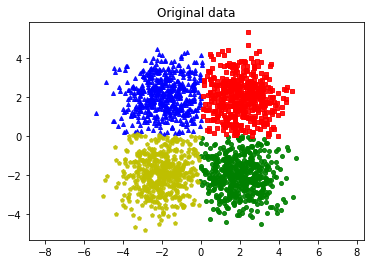

My algorithm converges through 9 iterations


In [25]:
(centers, labels, it) = kmeans(X, K)

print('Centers found by my algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])
print(f'My algorithm converges through {it} iterations')

In [46]:
X0_ = np.random.multivariate_normal(means[0], cov, N)
X1_ = np.random.multivariate_normal(means[1], cov, N)
X2_ = np.random.multivariate_normal(means[2], cov, N)
X3_ = np.random.multivariate_normal(means[3], cov, N)

X_ = np.concatenate((X0_, X1_, X2_, X3_), axis = 0)

In [47]:
y_pred = predict(X_, centers[-1])
print('predicted: ', y_pred)

predicted:  [2 2 2 ... 3 3 3]


# Using Scikit-Learn

Centers found by scikit-learn:
[[-1.92863915  2.07958253]
 [-2.07365018 -1.94306411]
 [ 2.05205035  1.99992544]
 [ 1.96200946 -2.02862201]]


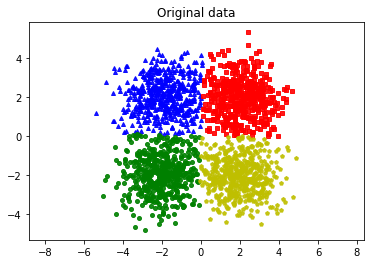

Kmeans converges after 12 iterations


In [ ]:
kmeans_s = KMeans(n_clusters = 4, random_state = 0).fit(X)

print('Centers found by scikit-learn:')
print(kmeans_s.cluster_centers_)

predict_labels = kmeans_s.predict(X)

kmeans_display(X, predict_labels)
print(f'Kmeans converges after {kmeans_s.n_iter_} iterations')

In [ ]:
centers[-1]

array([[ 1.96200946, -2.02862201],
       [-1.92863915,  2.07958253],
       [ 2.05205035,  1.99992544],
       [-2.07365018, -1.94306411]])